In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
from PIL import Image, ImageOps

In [2]:
import torch
import torch.nn as nn

from tqdm import tqdm

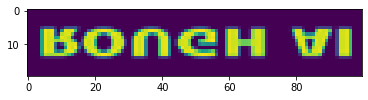

In [3]:
# img = plt.imread("./textimg0.png")
img = Image.open("./textimg2.png")

# a = 3
# img = img.resize((img.size[0]//a, img.size[1]//a))
img = img.resize((100, 20))

img = ImageOps.flip(img)
img = np.asarray(img)

# img = img[:,:,1]
img = -img[:,:,0]
plt.imshow(img)

In [4]:
img.shape

(20, 100)

In [5]:
def add_margin(img, top, right, bottom, left, color):
    height, width = img.shape
    new_height = height + top + bottom
    new_width = width + right + left
    
    result = np.ones((new_height, new_width))*color
    result[top:height+top, left:width+left] = img
    return result

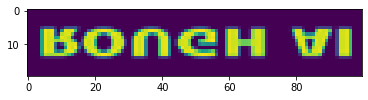

In [6]:
# img = add_margin(img, 50, 20, 50, 20, 0)
# img = add_margin(img, 10, 4, 10, 4, 0)
img = img/img.max()
plt.imshow(img)

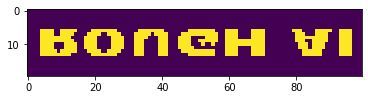

In [7]:
img = (img > 0.5).astype(float)
plt.imshow(img)

In [8]:
# img_ = Image.open("./textimg0.png")
# img_

In [19]:
img.shape

(20, 100)

In [9]:
ng = 400
_a,_b,_c,_d = 0, img.shape[1], 0, img.shape[0]
xg, yg = np.arange(0, img.shape[1], 1), np.arange(0, img.shape[0], 1)
## normalizing to -1, 1
xg = xg/xg.max()*2-1
yg = yg/yg.max()*2-1

xg, yg = np.meshgrid(xg, yg)
xx = np.stack([xg.reshape(-1), yg.reshape(-1)], axis=-1)
xx = torch.Tensor(xx)

x1 = xg.reshape(-1)
x2 = yg.reshape(-1)

In [10]:
x1.shape

(2000,)

In [11]:
yy = torch.Tensor(img.reshape(-1, 1))
y = yy.numpy()

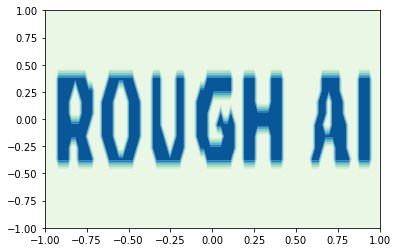

In [12]:
cf = plt.contourf(xg, yg, y.reshape(xg.shape),# v,
                 alpha=1, cmap=matplotlib.cm.GnBu, antialiased=True)

In [13]:
actf = nn.ReLU
# actf = nn.ELU
# actf = nn.Softplus

model = nn.Sequential(
                nn.Linear(2, 200),
                nn.BatchNorm1d(200),
                actf(),
#                 nn.Linear(200, 200),
#                 nn.BatchNorm1d(200),
#                 actf(),
                nn.Linear(200, 200),
                nn.BatchNorm1d(200),
                actf(),
                nn.Linear(200, 20),
                nn.BatchNorm1d(20),
                actf(),
                nn.Linear(20, 1),
#                 nn.Sigmoid(),
            )

In [14]:
# criterion = nn.BCELoss()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

  0%|          | 1/50001 [00:00<3:38:07,  3.82it/s]

Power i = 0


  0%|          | 3/50001 [00:00<1:57:17,  7.10it/s]

Power i = 1
Power i = 2


  0%|          | 10/50001 [00:00<1:04:44, 12.87it/s]

Power i = 3


  0%|          | 17/50001 [00:01<45:28, 18.32it/s]  

Power i = 4


  0%|          | 36/50001 [00:01<30:03, 27.70it/s]

Power i = 5


  0%|          | 66/50001 [00:02<27:33, 30.21it/s]

Power i = 6


  0%|          | 130/50001 [00:04<24:59, 33.26it/s]

Power i = 7


  1%|          | 260/50001 [00:07<30:23, 27.28it/s]

Power i = 8


  1%|          | 516/50001 [00:15<29:41, 27.77it/s]

Power i = 9


  2%|▏         | 1024/50001 [00:29<25:09, 32.44it/s]

Power i = 10


  4%|▍         | 2049/50001 [01:01<32:41, 24.45it/s]

Power i = 10


  6%|▌         | 3073/50001 [01:34<34:47, 22.48it/s]

Power i = 10


  8%|▊         | 4097/50001 [02:07<29:16, 26.13it/s]

Power i = 10


 10%|█         | 5124/50001 [02:39<29:09, 25.65it/s]

Power i = 10


 12%|█▏        | 6144/50001 [03:10<22:11, 32.95it/s]

Power i = 10


 14%|█▍        | 7171/50001 [03:41<28:05, 25.41it/s]

Power i = 10


 16%|█▋        | 8194/50001 [04:13<27:30, 25.32it/s]

Power i = 10


 18%|█▊        | 9217/50001 [04:44<28:38, 23.73it/s]

Power i = 10


 20%|██        | 10241/50001 [05:15<26:11, 25.30it/s]

Power i = 10


 23%|██▎       | 11265/50001 [05:47<25:43, 25.10it/s]

Power i = 10


 25%|██▍       | 12289/50001 [06:18<24:56, 25.19it/s]

Power i = 10


 27%|██▋       | 13314/50001 [06:50<24:42, 24.75it/s]

Power i = 10


 29%|██▊       | 14336/50001 [07:21<18:09, 32.74it/s]

Power i = 10


 31%|███       | 15360/50001 [07:53<17:44, 32.55it/s]

Power i = 10


 33%|███▎      | 16384/50001 [08:24<17:10, 32.61it/s]

Power i = 10


 35%|███▍      | 17409/50001 [08:56<21:39, 25.08it/s]

Power i = 10


 37%|███▋      | 18436/50001 [09:28<20:38, 25.49it/s]

Power i = 10


 39%|███▉      | 19459/50001 [10:00<20:10, 25.23it/s]

Power i = 10


 41%|████      | 20481/50001 [10:31<19:34, 25.13it/s]

Power i = 10


 43%|████▎     | 21507/50001 [11:03<18:51, 25.18it/s]

Power i = 10


 45%|████▌     | 22530/50001 [11:35<18:15, 25.09it/s]

Power i = 10


 47%|████▋     | 23554/50001 [12:06<17:27, 25.24it/s]

Power i = 10


 49%|████▉     | 24578/50001 [12:38<17:00, 24.90it/s]

Power i = 10


 51%|█████     | 25602/50001 [13:10<16:20, 24.88it/s]

Power i = 10


 53%|█████▎    | 26626/50001 [13:41<16:03, 24.25it/s]

Power i = 10


 55%|█████▌    | 27650/50001 [14:13<14:44, 25.26it/s]

Power i = 10


 57%|█████▋    | 28673/50001 [14:44<14:50, 23.95it/s]

Power i = 10


 59%|█████▉    | 29697/50001 [15:16<13:27, 25.15it/s]

Power i = 10


 61%|██████▏   | 30721/50001 [15:48<12:46, 25.15it/s]

Power i = 10


 63%|██████▎   | 31745/50001 [16:19<12:00, 25.35it/s]

Power i = 10


 66%|██████▌   | 32768/50001 [16:51<08:47, 32.69it/s]

Power i = 10


 68%|██████▊   | 33792/50001 [17:23<08:17, 32.58it/s]

Power i = 10


 70%|██████▉   | 34820/50001 [17:55<09:57, 25.41it/s]

Power i = 10


 72%|███████▏  | 35840/50001 [18:26<07:15, 32.53it/s]

Power i = 10


 74%|███████▎  | 36867/50001 [18:58<08:41, 25.17it/s]

Power i = 10


 76%|███████▌  | 37891/50001 [19:29<08:06, 24.88it/s]

Power i = 10


 78%|███████▊  | 38914/50001 [20:01<07:17, 25.37it/s]

Power i = 10


 80%|███████▉  | 39938/50001 [20:32<06:36, 25.37it/s]

Power i = 10


 82%|████████▏ | 40960/50001 [21:04<04:37, 32.56it/s]

Power i = 10


 84%|████████▍ | 41987/50001 [21:36<05:14, 25.47it/s]

Power i = 10


 86%|████████▌ | 43011/50001 [22:08<04:38, 25.12it/s]

Power i = 10


 88%|████████▊ | 44035/50001 [22:39<03:54, 25.40it/s]

Power i = 10


 90%|█████████ | 45056/50001 [23:11<02:30, 32.85it/s]

Power i = 10


 92%|█████████▏| 46080/50001 [23:43<02:00, 32.59it/s]

Power i = 10


 94%|█████████▍| 47104/50001 [24:15<01:29, 32.37it/s]

Power i = 10


 96%|█████████▋| 48129/50001 [24:47<01:14, 25.05it/s]

Power i = 10


 98%|█████████▊| 49152/50001 [25:19<00:26, 32.43it/s]

Power i = 10


100%|██████████| 50001/50001 [25:45<00:00, 32.35it/s]


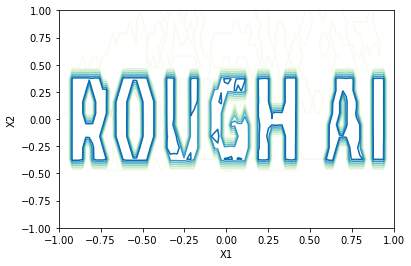

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca()#projection='3d')

model.train()
losses = []

output_list = []
i = 0
for epoch in tqdm(range(1000*50+1)):
    
    yout = model(xx)
    loss = criterion(yout, yy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
#     if epoch%100 == 0:
    if epoch % (2**i) == 0:
        print("Power i =",i)
        if i < 10: ## if need fast 14
            i+= 1
#         acc = (yout.data>0.5).type(torch.long)
#         losses.append(float(loss))
#         print(f"Epoch: {epoch} Loss: {losses[-1]} Accuracy: {acc}")

        ax.clear()
        model.eval()
        with torch.no_grad():
            yout = model(xx)
            
        model.train()
#         out = (yout.data.numpy()>0.5).astype(int)
        out = yout.data.numpy().astype(float)
        out = out.clip(min=0, max=1)
#         cf = ax.contourf(xg, yg, out.reshape(xg.shape),# v,
#                          alpha=1, cmap=matplotlib.cm.GnBu, antialiased=True)


        output_list.append(out)
        ax.contour(xg, yg, out.reshape(xg.shape),# v,
                         alpha=1, cmap=matplotlib.cm.GnBu, antialiased=True)
#         ax.grid()

#         ax.scatter(x1, x2, c=y, s=80, edgecolors='k', lw=0.5)
#         ax.scatter(x1, x2, c=yout.data.numpy().reshape(-1), marker='.')
            
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        
        fig.canvas.draw()
        plt.pause(0.01)


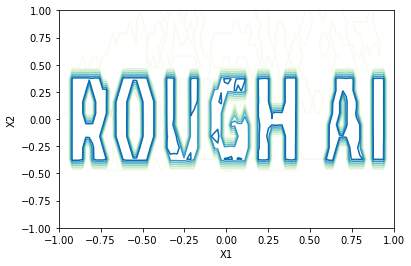

In [18]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca()#projection='3d')

for epoch in range(len(output_list)):
    ax.clear()
    out = output_list[epoch]
    ax.contour(xg, yg, out.reshape(xg.shape),# v,
                     alpha=1, cmap=matplotlib.cm.GnBu, antialiased=True)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

    fig.canvas.draw()
    plt.pause(0.01)

In [15]:
import pickle

In [22]:
# with open(r"imgs_out.pkl", "wb") as output_file:
#     pickle.dump(output_list, output_file)

In [16]:
# with open(r"imgs_out.pkl", "rb") as input_file:
#     data = pickle.load(input_file)

In [17]:
# output_list = data